In [1]:
import numpy as np
from spec_id import Gen_sim, Scale_model
from scipy.interpolate import interp1d, interp2d
from astropy.cosmology import Planck13 as cosmo
from astropy.io import ascii
from astropy.table import Table
# import rpy2
# import rpy2.robjects as robjects
# R = robjects.r
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sea
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({"xtick.direction": "in", "ytick.direction": "in"})
colmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.1, as_cmap=True)

/Users/vestrada/miniconda2/envs/astroconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
print 'done'

done


In [2]:
galDB = pd.read_pickle('../data/sgal_param_DB.pkl')
metal=np.arange(0.002,0.031,0.001)
age=np.arange(.5,6.1,.1)
tau=[0,8.0, 8.3, 8.48, 8.6, 8.7, 8.78, 8.85, 8.9, 8.95, 9.0, 9.04, 9.08, 9.11, 9.15, 9.18, 9.2, 9.23, 9.26, 9.28,
     9.3, 9.32, 9.34, 9.36, 9.38, 9.4, 9.41, 9.43, 9.45, 9.46, 9.48]
M,A=np.meshgrid(metal,age)

In [2]:
spec = Gen_sim(galDB['gids'][220],galDB['hi_res_specz'][220],0.019,3.5,8.0)

NameError: name 'Gen_sim' is not defined

In [30]:
spec.Perturb_flux()
spec.Sim_spec(0.005,2.0,0)

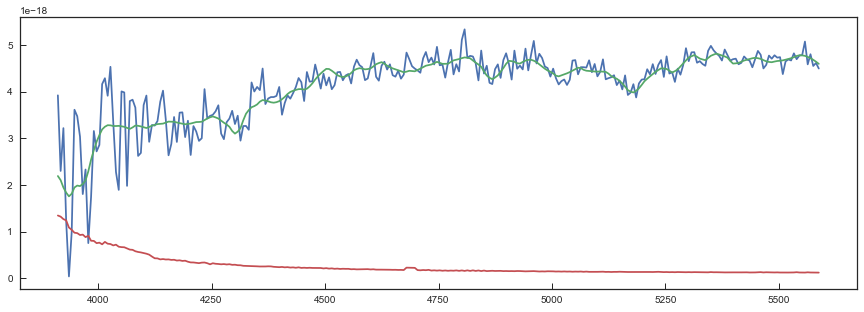

In [18]:
%matplotlib inline

plt.figure(figsize=[15,5])
plt.plot(spec.gal_wv_rf,spec.flx_err)
plt.plot(spec.gal_wv_rf,spec.fl)
plt.plot(spec.gal_wv_rf,spec.gal_er)

In [26]:
IDfe1 = []
IDfe2 = []
IDfe3 = []
IDca = []
IDhd = []
IDg = []
IDhb = []
IDmgb = []

IDf =[]
for i in range(len(spec.gal_wv_rf)):
    if 3800 <= spec.gal_wv_rf[i] <= 3850:
        IDfe1.append(i)
    if 3910 <= spec.gal_wv_rf[i] <= 4030:
        IDca.append(i)
    if 4080 <= spec.gal_wv_rf[i] <= 4125:
        IDhd.append(i)
    if 4250 <= spec.gal_wv_rf[i] <= 4385:
        IDg.append(i)
    if 4515 <= spec.gal_wv_rf[i] <= 4570:
        IDfe2.append(i)
    if 4810 <= spec.gal_wv_rf[i] <= 4910:
        IDhb.append(i)
    if 4975 <= spec.gal_wv_rf[i] <= 5055:
        IDfe3.append(i)
    if 5110 <= spec.gal_wv_rf[i] <= 5285:
        IDmgb.append(i)

IDF=np.array([IDfe1, IDca, IDhd, IDg, IDfe2, IDhb, IDfe3, IDmgb])

IDf = []
for i in range(len(spec.gal_wv_rf)):
    if 3800 <= spec.gal_wv_rf[i] <= 3850 or 3910 <= spec.gal_wv_rf[i] <= 4030 or 4080 <= spec.gal_wv_rf[i] <= 4125 \
            or 4250 <= spec.gal_wv_rf[i] <= 4385 or 4515 <= spec.gal_wv_rf[i] <= 4570 or 4810 <= spec.gal_wv_rf[i]\
            <= 4910 or 4975 <= spec.gal_wv_rf[i] <= 5055 or 5110 <= spec.gal_wv_rf[i] <= 5285:
        IDf.append(i)

In [46]:
def smoothing(fl,h):
    kernal=-np.linspace(-1,1,h+3)**2+1

    sm = np.zeros(len(fl))
    for i in range(len(fl)):
        w = np.zeros(len(fl))
        for ii in range(len(kernal)):
            if ii + i - h + 1 >= 0 and ii + i - h + 1 < len(fl):
                w[ii + i - h + 1] = kernal[ii] 
        sm[i] = sum(fl[w != 0] * w[w != 0]) / sum(w[w != 0])
    return sm

In [38]:
Fmfl = np.array([])
for i in range(len(IDF)):
    C = Scale_model(spec.flx_err[IDF[i]],spec.gal_er[IDF[i]],spec.mfl[IDF[i]])
    Fmfl = np.append(Fmfl,C*spec.mfl[IDF[i]])

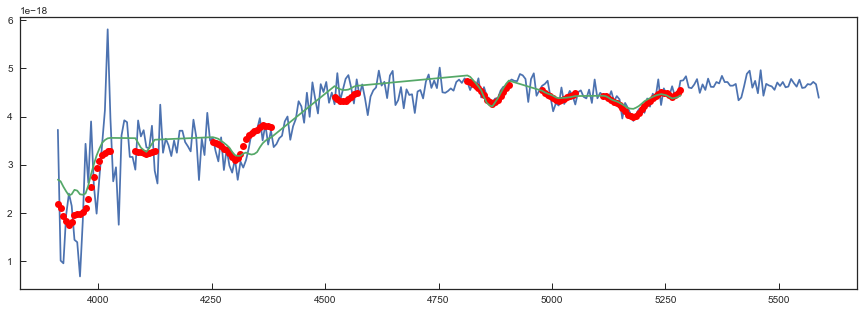

In [40]:
plt.figure(figsize=[15,5])
plt.plot(spec.gal_wv_rf,spec.flx_err)
plt.plot(spec.gal_wv_rf[IDf],spec.fl[IDf],'ro')
plt.plot(spec.gal_wv_rf[IDf],Fmfl)
plt.show()
plt.close()

In [59]:
smflxer = smoothing(spec.flx_err,25)
smfl = smoothing(spec.fl,25)

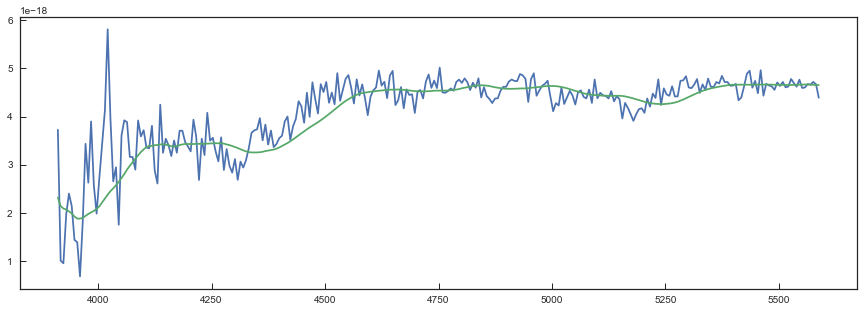

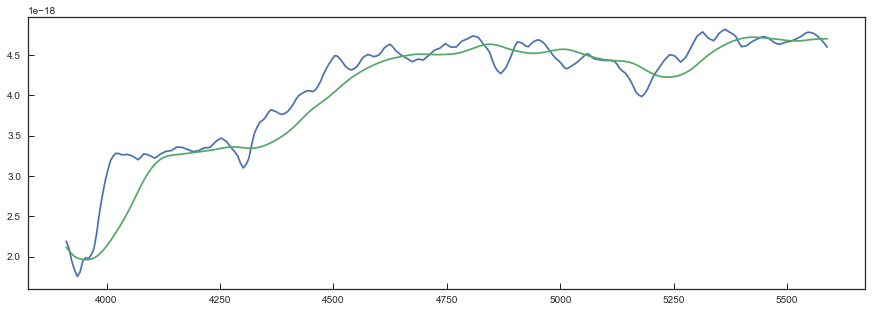

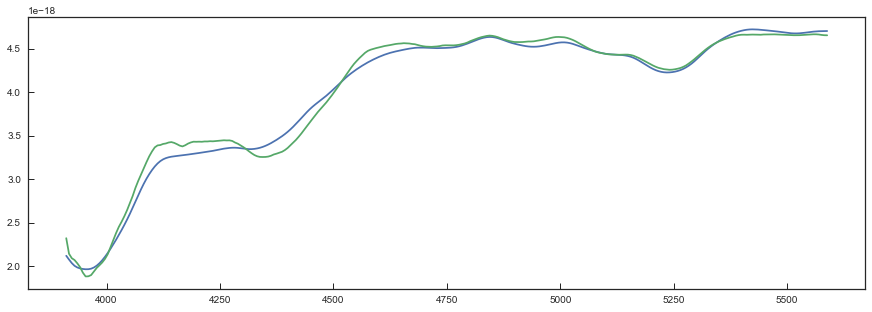

In [60]:
plt.figure(figsize=[15,5])
plt.plot(spec.gal_wv_rf,spec.flx_err)
plt.plot(spec.gal_wv_rf,smflxer)
plt.show()
plt.close()

plt.figure(figsize=[15,5])
plt.plot(spec.gal_wv_rf,spec.fl)
plt.plot(spec.gal_wv_rf,smfl)
plt.show()
plt.close()

plt.figure(figsize=[15,5])
plt.plot(spec.gal_wv_rf,smfl)
plt.plot(spec.gal_wv_rf,smflxer)
plt.show()
plt.close()